<a href="https://colab.research.google.com/github/brayla-oya/DDDS-My-Projects/blob/main/Project_5_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

This project will give you practical experience using Natural Language Processing techniques. This project is in three parts:
- in part 1) you will use a dataset in a CSV file
- in part 2) you will use the Wikipedia API to directly access content
on Wikipedia.
- in part 3) you will make your notebook interactive

### Part 1)

- The CSV file is available at https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv
- The file contains a list of famous people and a brief overview.
- The goal of part 1) is to ...
  1. Pick one person from the list ( the target person ) and output 10 other people who's overview are "closest" to the target person in a Natural Language Processing sense
  1. Also output the sentiment of the overview of the target person

#### Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
import random
from random import randint

import re
import nltk
# nltk.download('omw-1.4')
nltk.download('punkt_tab')
# nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"
!curl -s -I {url}

HTTP/1.1 200 OK
x-amz-id-2: ajzeG9yEk3iUoZx+jrTsIRiGBdtgmcUcV3jf06Dfnz3aK4bd1Vlt9PQkX9jP4scecWI4Pe0fiEk=
x-amz-request-id: 2GW30M9VNCE51WNE
Date: Tue, 15 Jul 2025 21:36:23 GMT
Last-Modified: Mon, 23 Oct 2023 18:30:29 GMT
ETag: "f4f3b3bc07aa7b6dddb6e383fc52ae64-10"
x-amz-server-side-encryption: AES256
Accept-Ranges: bytes
Content-Type: text/csv
Content-Length: 83886080
Server: AmazonS3



In [3]:
url = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.5-NLP/Data/NLP.csv"
NLP = pd.read_csv(url)
NLP

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...
...,...,...,...
42781,<http://dbpedia.org/resource/Motoaki_Takenouchi>,Motoaki Takenouchi,motoaki takenouchi born july 8 1967 saitama pr...
42782,<http://dbpedia.org/resource/Alan_Judge_(footb...,"Alan Judge (footballer, born 1960)",alan graham judge born 14 may 1960 is a retire...
42783,<http://dbpedia.org/resource/Eduardo_Lara>,Eduardo Lara,eduardo lara lozano born 4 september 1959 in c...
42784,<http://dbpedia.org/resource/Tatiana_Faberg%C3...,Tatiana Faberg%C3%A9,tatiana faberg is an author and faberg scholar...


#### Clean and exlpore data

In [4]:
NLP.shape

(42786, 3)

In [5]:
NLP.head()

,URI,name,text
0,<http://dbpedia.org/resource/Digby_Morrell>,Digby Morrell,digby morrell born 10 october 1979 is a former...
1,<http://dbpedia.org/resource/Alfred_J._Lewy>,Alfred J. Lewy,alfred j lewy aka sandy lewy graduated from un...
2,<http://dbpedia.org/resource/Harpdog_Brown>,Harpdog Brown,harpdog brown is a singer and harmonica player...
3,<http://dbpedia.org/resource/Franz_Rottensteiner>,Franz Rottensteiner,franz rottensteiner born in waidmannsfeld lowe...
4,<http://dbpedia.org/resource/G-Enka>,G-Enka,henry krvits born 30 december 1974 in tallinn ...


In [6]:
NLP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42786 entries, 0 to 42785
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   URI     42786 non-null  object
 1   name    42786 non-null  object
 2   text    42786 non-null  object
dtypes: object(3)
memory usage: 1002.9+ KB


In [7]:
NLP.describe()

,URI,name,text
count,42786,42786,42786
unique,42786,42785,42786
top,<http://dbpedia.org/resource/Kenneth_Thomas>,author),kenneth thomas born february 24 1938 was chief...
freq,1,2,1


Choosing target

In [8]:
# pick a random person by using randint
rand_person = randint(0,42786)
print(rand_person)

7572


In [9]:
NLP.iloc[23566]

,23566
URI,<http://dbpedia.org/resource/Jack_Rains>
name,Jack Rains
text,jack morris rains born november 23 1937 is a h...


In [10]:
Jack_Rains = NLP.iloc[23566,2]
Jack_Rains

'jack morris rains born november 23 1937 is a houston texas attorney who was the 95th secretary of state of texas having served from 19871989 he left the position to contest unsuccessfully for the republican gubernatorial nomination in 1990 he lost to businessman clayton w williams jr of midland who was then narrowly defeated in the general election by the democrat ann willis richards then the state treasurer other candidates in the field with rains and williams were kent hance a former congressman and previously a democrat and tom luce a dallas lawyerrains a native of waco has served on numerous public boards including the chairmanship of the board of the harris countyhouston sports authority professionally mr rains is of counsel to the law firm looper reed mcgraw pc with offices in houston and dallas he is also a management consultant to a number of companies including ecology environment inc a scientific environmental firm that practices on a global basis he was a founder of tuscany

In [11]:
Jack_Rains_clean = Jack_Rains.lower()
for c in ["\n", "'s", "'", "  "]:
  Jack_Rains_clean = Jack_Rains_clean.replace(c," ")
Jack_Rains_clean

'jack morris rains born november 23 1937 is a houston texas attorney who was the 95th secretary of state of texas having served from 19871989 he left the position to contest unsuccessfully for the republican gubernatorial nomination in 1990 he lost to businessman clayton w williams jr of midland who was then narrowly defeated in the general election by the democrat ann willis richards then the state treasurer other candidates in the field with rains and williams were kent hance a former congressman and previously a democrat and tom luce a dallas lawyerrains a native of waco has served on numerous public boards including the chairmanship of the board of the harris countyhouston sports authority professionally mr rains is of counsel to the law firm looper reed mcgraw pc with offices in houston and dallas he is also a management consultant to a number of companies including ecology environment inc a scientific environmental firm that practices on a global basis he was a founder of tuscany

##### Sentiment Overview

In [12]:
blob = TextBlob(Jack_Rains_clean)
print(blob.sentiment)

Sentiment(polarity=-0.014393939393939393, subjectivity=0.2768939393939394)


In [13]:
NLP_clean = NLP.iloc[:,2].str.lower()
for c in ["\n", "'s", "'", "  "]:
  NLP_clean = NLP_clean.replace(c," ")
NLP_clean

,text
0,digby morrell born 10 october 1979 is a former...
1,alfred j lewy aka sandy lewy graduated from un...
2,harpdog brown is a singer and harmonica player...
3,franz rottensteiner born in waidmannsfeld lowe...
4,henry krvits born 30 december 1974 in tallinn ...
...,...
42781,motoaki takenouchi born july 8 1967 saitama pr...
42782,alan graham judge born 14 may 1960 is a retire...
42783,eduardo lara lozano born 4 september 1959 in c...
42784,tatiana faberg is an author and faberg scholar...


In [14]:
NLP_clean.head()

,text
0,digby morrell born 10 october 1979 is a former...
1,alfred j lewy aka sandy lewy graduated from un...
2,harpdog brown is a singer and harmonica player...
3,franz rottensteiner born in waidmannsfeld lowe...
4,henry krvits born 30 december 1974 in tallinn ...


In [15]:
# Perform the TF-IDF Vectorization
tf_idf_vec = TfidfVectorizer(
    stop_words = 'english',
    max_features=5000
    )
tf_idf_pop = tf_idf_vec.fit_transform(NLP_clean)
tf_idf_pop.shape

(42786, 5000)

In [16]:
tf_idf_pop

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 4141080 stored elements and shape (42786, 5000)>

In [17]:
tf_idf_pop.transpose().shape

(5000, 42786)

In [18]:
np.set_printoptions(precision=6, formatter=None)
tf_idf_vec.get_feature_names_out()

array(['10', '100', '1000', ..., 'zimbabwe', 'zone', 'zurich'],
      dtype=object)

In [19]:
# Print out results in a dataframe
pd.set_option('display.max_rows', 10)
tf_df = pd.DataFrame(tf_idf_pop.toarray(), columns = tf_idf_vec.get_feature_names_out())
tf_df.transpose()

,0,1,2,3,4,5,6,7,8,9,...,42776,42777,42778,42779,42780,42781,42782,42783,42784,42785
10,0.053843,0.0,0.0,0.0,0.0,0.0,0.03576,0.000000,0.0,0.0,...,0.0,0.039359,0.0,0.0,0.0,0.0,0.0,0.044806,0.0,0.0
100,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.055892,0.0,0.0,...,0.0,0.065917,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
10000,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
10th,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zealand,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
zero,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
zimbabwe,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
zone,0.000000,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


#### Nearest Neighbors

In [20]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(NLP['text'])

tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)

target_name = "Jack Rains"
target_index = NLP[NLP['name'] == target_name].index[0]

knn = NearestNeighbors(n_neighbors=11, metric='cosine')  # 11 to include the target
knn.fit(X_tfidf)

distances, indices = knn.kneighbors(X_tfidf[target_index])

nearest_neighbor = []
for i, idx in enumerate(indices[0]):
    if idx != target_index:
        similarity = 1 - distances[0][i]  # convert cosine distance to similarity
        nearest_neighbor.append((NLP.iloc[idx]['name'], similarity))
# Step 7: Sentiment Analysis
# target_text = NLP.iloc[target_index]['text']
# sentiment = TextBlob(target_text).sentiment

# Final Output
print("Target Person:", target_name)
# print("Sentiment of Overview:")
# print(f"  Polarity: {sentiment.polarity:.3f}, Subjectivity: {sentiment.subjectivity:.3f}\n")

print("Top 10 Nearest Neighbors:")
for name, sim in nearest_neighbor[:10]:
    print(f"  {name} (Similarity Score: {sim:.2%})")

Target Person: Jack Rains
Top 10 Nearest Neighbors:
  Dominic Rains (Similarity Score: 30.54%)
  Al Carter (Similarity Score: 20.57%)
  Arthur Louis Schechter (Similarity Score: 19.70%)
  Clarence Bradford (Similarity Score: 17.58%)
  Carol Vance (Similarity Score: 16.58%)
  John C. Eastman (Similarity Score: 16.29%)
  John L. Nau (Similarity Score: 16.19%)
  Vanessa Gilmore (Similarity Score: 16.10%)
  M.J. Khan (Similarity Score: 15.80%)
  David G. Epstein (Similarity Score: 15.73%)


# Part 2)

- For the same target person that you chose in Part 1), use the Wikipedia API to access the whole content of the target person's Wikipedia page.
- The goal of Part 2) is to ...
  1. Print out the text of the Wikipedia article for the target person
  1. Determine the sentiment of the text of the Wikipedia page for the target person
  1. Collect the text of the Wikipedia pages from the 10 nearest neighbors from Part 1)
  1. Determine the nearness ranking of these 10 people to your target person based on their entire Wikipedia page
  1. Compare, i.e. plot,  the nearest ranking from Step 1) with the Wikipedia page nearness ranking.  A difference of the rank is one means of comparison.

#### Import

In [21]:
%%capture
!pip3 install wikipedia-api
import wikipediaapi

In [22]:
topic = 'Jack Rains'
wikip = wikipediaapi.Wikipedia('foobar')
page_ex = wikip.page(topic)
wiki_text_JR = page_ex.text
wiki_text_JR

'Jack Morris Rains (November 23, 1937 – July 5, 2023) was an American attorney in Houston, Texas, who was the 95th Secretary of State of Texas, having served from 1987 to 1989. He left the position to contest unsuccessfully for the Republican gubernatorial nomination in 1990. He lost to businessman Clayton W. Williams, Jr., of Midland, who was then narrowly defeated in the general election by the Democrat Ann Willis Richards, then the state treasurer. Other candidates in the field with Rains and Williams were Kent Hance, a former congressman and previously a Democrat, and Tom Luce, a Dallas lawyer.\nRains died on July 5, 2023, at the age of 85.\n\n\n== References =='

In [23]:
wiki_text_JRclean = (
  wiki_text_JR
  .lower()
  .replace("\n"," ")
  .replace("\'s",'')
  .replace('\'','')
  .replace("(", "")
  .replace(")", "")
  .replace('"', "")
)
wiki_text_JRclean

'jack morris rains november 23, 1937 – july 5, 2023 was an american attorney in houston, texas, who was the 95th secretary of state of texas, having served from 1987 to 1989. he left the position to contest unsuccessfully for the republican gubernatorial nomination in 1990. he lost to businessman clayton w. williams, jr., of midland, who was then narrowly defeated in the general election by the democrat ann willis richards, then the state treasurer. other candidates in the field with rains and williams were kent hance, a former congressman and previously a democrat, and tom luce, a dallas lawyer. rains died on july 5, 2023, at the age of 85.   == references =='

#### Target Article Sentiment

In [24]:
wiki_text_JRclean = TextBlob(wiki_text_JRclean)
wiki_text_JRclean.sentiment

Sentiment(polarity=-0.0630952380952381, subjectivity=0.20595238095238094)

In [25]:
neighbor_titles = [
  "Dominic Rains",
  "Al Carter",
  "Arthur Louis Schechter",
  "Clarence Bradford",
  "Carol Vance" ,
  "John C. Eastman" ,
  "John L. Nau",
  "Vanessa Gilmore ",
  "M.J. Khan" ,
  "David G. Epstein"
]
# Text cleaning function
def clean_wikipedia_text(text):
    text = re.sub(r'\[\d+\]', '', text)
    text = re.split(r'==\s*References\s*==', text)[0]
    text = re.sub(r'==+.*?==+', '', text)
    return re.sub(r'\s+', ' ', text).strip()

# Fetch and clean pages
titles = ['Jack Rains'] + neighbor_titles
texts = []
valid_titles = []

for title in titles:
    page = wikip.page(title)
    if page.exists():
        cleaned = clean_wikipedia_text(page.text)
        texts.append(cleaned)
        valid_titles.append(title)
    else:
        print(f"Page not found: {title}")

# Compute TF-IDF matrix
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(texts)

# Compute cosine similarities
cos_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])[0]  # similarities to target

# Rank by similarity
ranked = sorted(zip(valid_titles[1:], cos_sim), key=lambda x: x[1], reverse=True)

# Print ranked results
print("\n--- Similarity Ranking to Target: Jack Rains ---\n")
for i, (title, score) in enumerate(ranked, 1):
    print(f"{i}. {title}: {score:.2%}")


--- Similarity Ranking to Target: Jack Rains ---

1. Dominic Rains: 20.41%
2. Carol Vance: 7.06%
3. John L. Nau: 5.20%
4. John C. Eastman: 5.01%
5. Clarence Bradford: 4.98%
6. M.J. Khan: 4.24%
7. Al Carter: 4.17%
8. Vanessa Gilmore : 3.42%
9. David G. Epstein: 2.74%
10. Arthur Louis Schechter: 2.28%


In [26]:
# Assuming you have this data-based ranking from Part 1 (replace with actual data)
ranked_data = [
  "Dominic Rains",
  "Al Carter",
  "Arthur Louis Schechter",
  "Clarence Bradford",
  "Carol Vance" ,
  "John C. Eastman" ,
  "John L. Nau",
  "Vanessa Gilmore ",
  "M.J. Khan" ,
  "David G. Epstein"
]

# The Wikipedia-based ranking we calculated previously (from ranked list)
wiki_ranking = [title for title, _ in ranked]

# Calculate the rank difference
rank_differences = {}

for person in ranked_data:
    if person in wiki_ranking:
        ranked_rank = ranked_data.index(person) + 1
        wiki_rank = wiki_ranking.index(person) + 1
        rank_difference = abs(ranked_rank - wiki_rank)
        print(f"{person}: Difference = {rank_difference}")

# Display rank differences
print("\n--- Rank Differences ---\n")
for person, diff in rank_differences.items():
    print(f"{person}: Difference = {diff}")


Dominic Rains: Difference = 0
Al Carter: Difference = 5
Arthur Louis Schechter: Difference = 7
Clarence Bradford: Difference = 1
Carol Vance: Difference = 3
John C. Eastman: Difference = 2
John L. Nau: Difference = 4
Vanessa Gilmore : Difference = 0
M.J. Khan: Difference = 3
David G. Epstein: Difference = 1

--- Rank Differences ---



In [27]:
diff = {"Dominic Rains": 0,
"Al Carter": 5,
"Arthur Louis Schechter": 7,
"Clarence Bradford": 1,
"Carol Vance": 3,
"John C. Eastman":  2,
"John L. Nau": 4,
"Vanessa Gilmore" : 0,
"M.J. Khan": 3,
"David G. Epstein": 1}


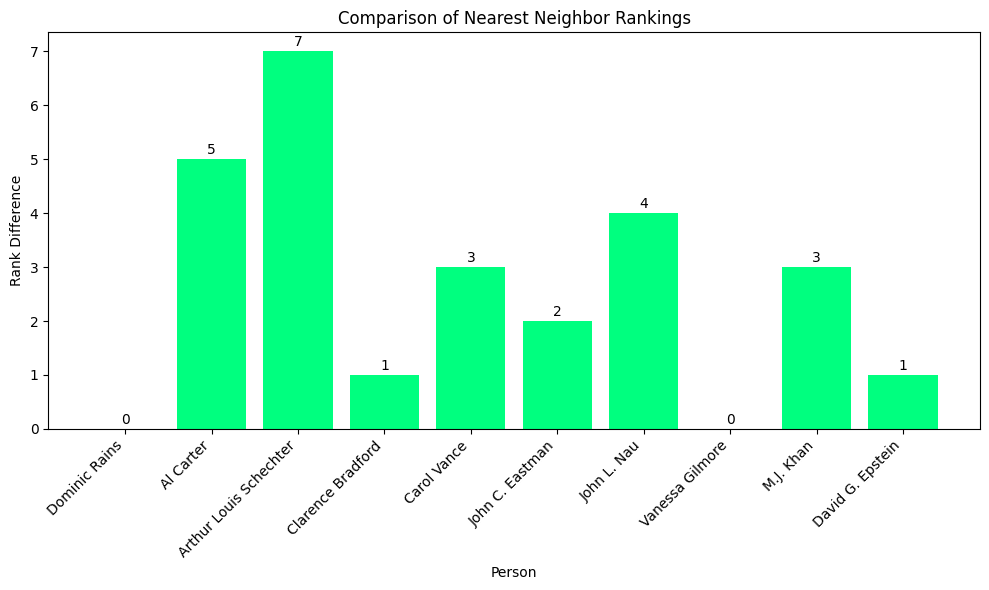

In [28]:
names = list(diff.keys())
differences = list(diff.values())


# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(names, differences, color='springgreen')
plt.title("Comparison of Nearest Neighbor Rankings")
plt.xlabel("Person")
plt.ylabel("Rank Difference")
plt.xticks(rotation=45, ha='right')

# Add values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.1, f"{int(height)}",
             ha='center', fontsize=10)

plt.tight_layout()
plt.show()

# Part 3)

Make an interactive notebook where a user can choose or enter a name and the notebook displays the 10 closest individuals.

In addition to presenting the project slides, at the end of the presentation each student will demonstrate their code using a famous person suggested by the other students that exists in the DBpedia set.


# Nearest Neighbor Explorer with DBpedia

In [29]:
tfidf_matrix.shape

(11, 2340)

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import ipywidgets as widgets
from IPython.display import display, HTML
import re # Essential for regular expressions
import numpy as np

# Assign 'text' column to 'document_content'. This will raise KeyError if 'text' is missing.
NLP['document_content'] = NLP['text']

# Create a simplified 'Name' column from the first few words of 'document_content'
NLP['Name'] = NLP['document_content'].apply(lambda x: ' '.join(str(x).split()[:5]) if pd.notna(x) else '')

# Preprocessing function for text cleaning
def preprocess_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""
    text = text.lower()
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text

NLP['processed_text'] = NLP['document_content'].apply(preprocess_text)

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english',
                                   min_df=0.002, max_df=0.7,
                                  #  max_features=50000
)


# Fit and transform the processed text to create the TF-IDF matrix.
# This will raise ValueError if 'processed_text' is empty or too sparse.
tfidf_matrix = tfidf_vectorizer.fit_transform(NLP['processed_text'])


# --- Finding Nearest Neighbors Function (Helper function) ---

def find_nearest_neighbors(person_name, top_n=10):
    # Find the index of the person in the DataFrame using the generated 'Name' column
    person_matches = NLP[NLP['Name'].str.contains(person_name, case=False, na=False)].index.tolist()

    if not person_matches:
        # Try to find a partial match in the 'document_content'
        potential_matches_df = NLP[NLP['document_content'].str.contains(person_name, case=False, na=False)]
        person_matches = potential_matches_df.index.tolist()

        if not person_matches:
            return "Person not found in the dataset. Please try a different name."
        # elif len(person_matches) > 1:
        #     return "Multiple matches found. Please be more specific or try one of the listed indices if known."

    # Ensure person_idx is always a single integer index
    person_idx = person_matches[0]

    # Get the TF-IDF vector for the target person
    person_vector = tfidf_matrix[person_idx]

    # Calculate cosine similarity with all other documents
    cosine_similarities = cosine_similarity(person_vector, tfidf_matrix).flatten()

    # Get the indices of the top N most similar individuals
    # Gives an array of indices
    # Removes index of doc and reverses order, so most similar is first
    similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]

    # Get the names and similarity scores of the nearest neighbors
    # If name is missing or empty, then it will use the first 50 characters of doc
    nearest_neighbors = []
    for i in similar_indices:
        similarity_score = cosine_similarities[i]
        name = NLP.loc[i, 'Name'] if pd.notna(NLP.loc[i, 'Name']) and NLP.loc[i, 'Name'] != '' else NLP.loc[i, 'document_content'][:50] + "..."
        nearest_neighbors.append({'Name': name, 'Similarity': similarity_score})

    return nearest_neighbors

# --- Main Interactive Search Function ---

def run_nearest_neighbors_search():
    # Input widget for the name
    name_input = widgets.Text(
        value='',
        placeholder='Enter a famous person\'s name',
        description='Name:',
        disabled=False
    )

    # Output widget to display results
    output = widgets.Output()

    # Function to be called when Enter is pressed in the text field
    def on_submit_search(widget_instance): # 'widget_instance' is the Text widget itself
        with output:
            output.clear_output()
            person_name = name_input.value.strip()
            if not person_name:
                print("Please enter a name.")
                return

            print(f"Searching for nearest neighbors to: {person_name}\n")
            nearest = find_nearest_neighbors(person_name)

            if isinstance(nearest, str):
                print(nearest)
            else:
                print("Top 10 Nearest Neighbors:")
                for i, person in enumerate(nearest):
                    print(f"{i+1}. {person['Name']} (Similarity: {person['Similarity']:.2%})")

    # Attach the on_submit event to the text input for Enter key functionality
    name_input.on_submit(on_submit_search)

    # Display the widgets in the notebook
    print("\n### Interactive Nearest Neighbors Search ###")
    print("Enter a famous person's name (and press Enter) to find nearest neighbors.")
    display(name_input, output)

# --- Run the Interactive Search ---
if __name__ == "__main__":
    run_nearest_neighbors_search()


### Interactive Nearest Neighbors Search ###
Enter a famous person's name (and press Enter) to find nearest neighbors.


Text(value='', description='Name:', placeholder="Enter a famous person's name")

Output()